In [1]:
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt


def calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class):
    min_distances = np.zeros(len(calc_arg_maxs))
    for i in range(len(calc_arg_maxs)):
        dist = pred_arg_maxs[i] - calc_arg_maxs[i]
        if np.abs((num_class - 1) + (pred_arg_maxs[i] - calc_arg_maxs[i]))<np.abs(dist):
            dist =(num_class - 1) + (pred_arg_maxs[i] - calc_arg_maxs[i])
        if np.abs(-(num_class - 1) + (pred_arg_maxs[i] - calc_arg_maxs[i]))<np.abs(dist):
            dist = -(num_class - 1) + (pred_arg_maxs[i] - calc_arg_maxs[i])
        min_distances[i] = dist
    return min_distances

def calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class):
    
    calc_argmaxs_distances = np.min(
         np.stack(
            [np.abs(pred_arg_maxs-calc_arg_maxs), ((num_class - 1) - np.abs(pred_arg_maxs-calc_arg_maxs))]
        ), axis=0)

    return calc_argmaxs_distances




In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from cpmix_utils import weight_fun, calc_weights, calc_min_distances, calculate_metrics

In [3]:
filenames = [f'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{i}' for i in range(2,51)]

In [4]:
def get_filename_for_class(class_num, subset=None):
    d = f'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{class_num}'
    if subset:
        d += "_WEIGHTS_SUBS" + str(subset)
    return d

In [5]:
def load_data(num_class):
    directory = get_filename_for_class(num_class)
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    return pred_arg_maxs, calc_arg_maxs

# Check different num classes

In [6]:
for num_class in range(2, 40):
    pred_arg_maxs, calc_arg_maxs = load_data(num_class)
    res1 = calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class)
    min_distances = calc_min_distances(pred_arg_maxs, calc_arg_maxs, num_class) # Function from cpmix_utils
    res1_vs_utils = np.all(min_distances==res1)
    
    res2 = calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class)
    # calc_argmaxs_distances1 is more general (it preserves direction) --> np.abs(res1) 
    abs_res1_vs_res2 = np.all(np.abs(res1)==res2)
    print('res1_vs_utils: {} abs_res1_vs_res2: {}'.format(res1_vs_utils, abs_res1_vs_res2))

res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_utils: True abs_res1_vs_res2: True
res1_vs_uti

# Num class 10

In [7]:
num_class = 10
pred_arg_maxs, calc_arg_maxs = load_data(num_class)

In [8]:
res1 = calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class)
res2 = calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class)

In [9]:
#res1 = np.abs(res1) # calc_argmaxs_distances1 is more general (it preserves direction)

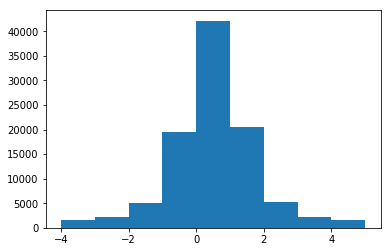

In [10]:
bins = list(range(int(np.min(res1)), int(np.max(res1)+2)))
_= plt.hist(res1, bins=bins)

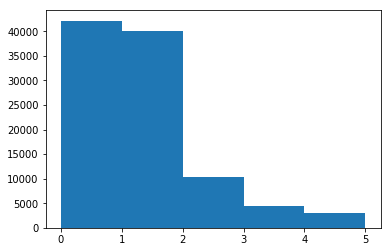

In [11]:
bins = list(range(int(np.min(res2)), int(np.max(res2)+2)))
_= plt.hist(res2, bins=bins)

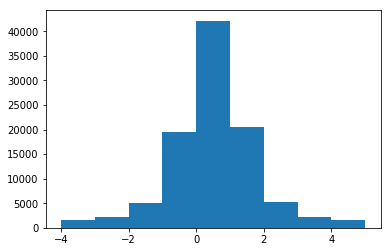

In [12]:
min_distances = calc_min_distances(pred_arg_maxs, calc_arg_maxs, num_class)
bins = list(range(int(np.min(min_distances)), int(np.max(min_distances)+2)))
_= plt.hist(min_distances, bins=bins)

In [13]:
np.all(res1==res2)

False

# Num class 31

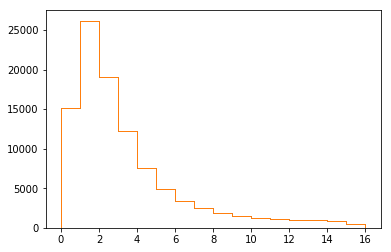

In [15]:
num_class = 31
pred_arg_maxs, calc_arg_maxs = load_data(num_class)
res1 = calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class)
res2 = calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class)
res1 = np.abs(res1) # calc_argmaxs_distances1 is more general (it preserves direction)
bins1 = list(range(int(np.min(res1)), int(np.max(res1)+2)))
_= plt.hist(res1, bins1, histtype='step')
bins2 = list(range(int(np.min(res2)), int(np.max(res2)+2)))
_= plt.hist(res2, bins=bins2, histtype='step')